## Overview

In recent years, there has been growing interest in using the 
the [Provenance Data Model](https://www.w3.org/TR/prov-primer/) (PROV) from the World Wide Web Consortium (W3C)
to capture the provenance of climate data products.
It defines a core data model (PROV-DM) for building representations of the entities, people and processes
involved in producing a piece of data or thing in the world,
along with corresponding serialisations (e.g., PROV-JSON, PROV-XML, PROV-O).

The [`prov`](https://prov.readthedocs.io/en/latest/) Python library supports
PROV-O, PROV-XML, PROV-JSON import/export.
There's a good [tutorial](https://nbviewer.jupyter.org/github/trungdong/notebooks/blob/master/PROV%20Tutorial.ipynb)
on how to use it.

A PROV document consists of *agents*, *activities* and *entities* that are all connected by *relations*.
In order to label these things, various URIs and namespaces are used.
For example, the [`rook`](https://rook-wps.readthedocs.io/en/latest/index.html) package (which allows remote access to climate data)
[describes in detail](https://rook-wps.readthedocs.io/en/latest/prov.html) how they decide on labels.
[ESMValTool](https://docs.esmvaltool.org/en/latest/community/diagnostic.html#recording-provenance)
also outputs PROV-XML files.

## Definitions

- An *entity* is a physical, digital, conceptual, or other kind of thing with some fixed aspects; entities may be real or imaginary.
- An *activity* is something that occurs over a period of time and acts upon or with entities; it may include consuming, processing, transforming, modifying, relocating, using, or generating entities.
- An *agent* is something that bears some form of responsibility for an activity taking place, for the existence of an entity, or for another agent’s activity.
- A *Uniform Resource Identifier (URI)* is a unique sequence of characters that identifies a logical or physical resource used by web technologies. URIs may be used to identify anything, including real-world objects, such as people and places, concepts, or information resources such as web pages and books.

## Notes

- Here's a Python library that allows you to use decorators to get functions to log provenance info when they are called: https://github.com/bmabey/provenance/issues/59
- There's a place to store PROV files: https://openprovenance.org/store/ 


In [1]:
from prov.model import ProvDocument
from prov.dot import prov_to_dot
from IPython.display import Image

In [2]:
provdoc = ProvDocument()

In [3]:
provdoc.add_namespace("prov", uri="http://www.w3.org/ns/prov#")
provdoc.add_namespace("provone", uri="http://purl.dataone.org/provone/2015/01/15/ontology#")
provdoc.add_namespace("dcterms", uri="http://purl.org/dc/terms/")

<Namespace: dcterms {http://purl.org/dc/terms/}>

In [4]:
provdoc.add_namespace("esgf", "https://esgf.llnl.gov/")
provdoc.add_namespace("csiro", "https://www.csiro.au")
provdoc.add_namespace("acs", "https://www.acs.gov.au/")
provdoc.add_namespace("nci", "https://nci.org.au/")

<Namespace: nci {https://nci.org.au/}>

In [5]:
data = provdoc.entity('esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc')

In [6]:
figure = provdoc.entity('acs:demo.png')

In [7]:
provdoc.agent("acs:code", {"prov:type": "prov:SoftwareAgent",
                           "dcterms:source": "https://github.com/ClimResAus/code-roadmap"})

<ProvAgent: acs:code>

In [8]:
provdoc.agent('csiro:damien')

<ProvAgent: csiro:damien>

In [9]:
provdoc.wasAttributedTo('acs:code', 'csiro:damien')

<ProvAttribution: (acs:code, csiro:damien)>

In [10]:
provdoc.activity('nci:processData1')

<ProvActivity: nci:processData1>

In [11]:
provdoc.activity('nci:processData2')

<ProvActivity: nci:processData2>

In [12]:
provdoc.used('nci:processData1', 'esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc')
provdoc.wasInformedBy('nci:processData2', 'nci:processData1')
provdoc.wasGeneratedBy('acs:demo.png', 'nci:processData2')

<ProvGeneration: (acs:demo.png, nci:processData2)>

In [13]:
provdoc.wasAssociatedWith('nci:processData1', 'acs:code')
provdoc.wasAssociatedWith('nci:processData2', 'acs:code')

<ProvAssociation: (nci:processData2, acs:code)>

In [14]:
print(provdoc.get_provn())

document
  prefix provone <http://purl.dataone.org/provone/2015/01/15/ontology#>
  prefix dcterms <http://purl.org/dc/terms/>
  prefix esgf <https://esgf.llnl.gov/>
  prefix csiro <https://www.csiro.au>
  prefix acs <https://www.acs.gov.au/>
  prefix nci <https://nci.org.au/>
  
  entity(esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc)
  entity(acs:demo.png)
  agent(acs:code, [prov:type="prov:SoftwareAgent", dcterms:source="https://github.com/ClimResAus/code-roadmap"])
  agent(csiro:damien)
  wasAttributedTo(acs:code, csiro:damien)
  activity(nci:processData1, -, -)
  activity(nci:processData2, -, -)
  used(nci:processData1, esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc, -)
  wasInformedBy(nci:processData2, nci:processData1)
  wasGeneratedBy(acs:demo.png, nci:processData2, -)
  wasAssociatedWith(nci:processData1, acs:code, -)
  wasAssociatedWith(nci:processData2, acs:code, -)
endDocument


In [15]:
dot = prov_to_dot(provdoc)
dot.write_png('article-prov.png')

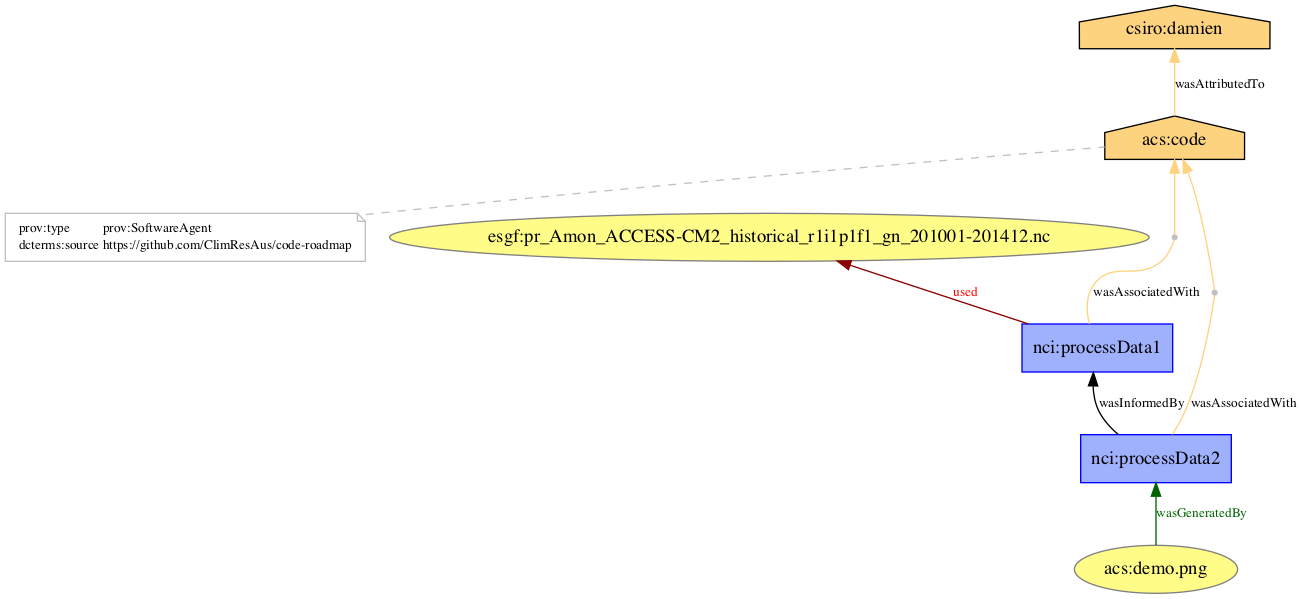

In [16]:
Image('article-prov.png')

In [17]:
print(provdoc.serialize(indent=2))
#provdoc.serialize('article-prov.json')

{
  "prefix": {
    "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#",
    "dcterms": "http://purl.org/dc/terms/",
    "esgf": "https://esgf.llnl.gov/",
    "csiro": "https://www.csiro.au",
    "acs": "https://www.acs.gov.au/",
    "nci": "https://nci.org.au/"
  },
  "entity": {
    "esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc": {},
    "acs:demo.png": {}
  },
  "agent": {
    "acs:code": {
      "prov:type": "prov:SoftwareAgent",
      "dcterms:source": "https://github.com/ClimResAus/code-roadmap"
    },
    "csiro:damien": {}
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "acs:code",
      "prov:agent": "csiro:damien"
    }
  },
  "activity": {
    "nci:processData1": {},
    "nci:processData2": {}
  },
  "used": {
    "_:id2": {
      "prov:activity": "nci:processData1",
      "prov:entity": "esgf:pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc"
    }
  },
  "wasInformedBy": {
    "_:id3": {
      "prov:informed": "nci:

In [17]:
dir(provdoc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_record',
 '_bundles',
 '_document',
 '_id_map',
 '_identifier',
 '_namespaces',
 '_records',
 '_unified_records',
 'actedOnBehalfOf',
 'activity',
 'add_bundle',
 'add_namespace',
 'add_record',
 'agent',
 'alternate',
 'alternateOf',
 'association',
 'attribution',
 'bundle',
 'bundles',
 'collection',
 'communication',
 'default_ns_uri',
 'delegation',
 'derivation',
 'deserialize',
 'document',
 'end',
 'entity',
 'flattened',
 'generation',
 'get_default_namespace',
 'get_provn',
 'get_record',
 'get_records',
 'get_registered_namespaces',
 'hadMember',
 'hadPrimarySource',
 'has_bundles',
 'identifier',
 'influ